<a href="https://colab.research.google.com/github/HanSeoulOh/mathproblems/blob/master/privacyMath.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of Privacy Techniques

The purpose of this notebook is to analyze the performance of various privacy techniques.

##### Helpers

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns

### Naive Dataset 1

We will generate a naive dataset that consists of rows of tuples in the following format: $(id_1, id_2, amt, des)$

Where: 
- $id_1$ is the sender
- $id_2$ is the receiver
- $amt$ is the amount transferred
- $des$ is a description

For purposes of simplicity we will start with $amt = 1$ and $des$ being a random real number from $\mathbb{R}^{[0,1]}$; $id_1, id_2 \in \mathbb{Z}$


In [0]:
class naiveDataSet:
  def __init__(self, population = 10, tx = 100):
    self.data = pd.DataFrame(data = np.array([np.random.randint(population, size=tx), np.random.randint(population, size=tx), np.ones(tx), np.random.rand(tx)]).T, columns = ['sender', 'receiver', 'amount', 'description'])

Visualizing generated dataset

In [3]:
nds = naiveDataSet()
nds.data

,sender,receiver,amount,description
0,9.0,7.0,1.0,0.305972
1,6.0,6.0,1.0,0.433605
2,0.0,4.0,1.0,0.542019
3,6.0,7.0,1.0,0.277336
4,0.0,8.0,1.0,0.663758
...,...,...,...,...
95,3.0,5.0,1.0,0.608943
96,5.0,7.0,1.0,0.515223
97,2.0,7.0,1.0,0.760234
98,8.0,6.0,1.0,0.266505


In [4]:
nds.data.groupby(['sender']).sum().mean()

receiver       47.900000
amount         10.000000
description     4.891576
dtype: float64

### Differential Privacy


The fundamental equation of differential privacy is given as: $\Pr [\mathcal{K}(D) \in S] \le e^\epsilon \times \Pr [ \mathcal{K} (D') \in S]$



##### Useful References


- https://en.wikipedia.org/wiki/Differential_privacy
- https://en.wikipedia.org/wiki/Reconstruction_attack


### Local Differential Privacy Example

Let's construct a naive POS' dataset where there are two kinds of products, one cheap, one expensive. For some reason, whatever the expensive product is being sold here, clients do not want others to know that they have a pattern in purchasing it. Perhaps the store sells normal day to day groceries, but the expensive product is an alcoholic beverage and a client would not want to be identified as being a frequent purchaser.

The rows in this dataset are represented by tuples in the form $(client, amount)$.

A statistics agency wants the data by this POS to conduct their analytics but their clients wouldn't appreciate their identities being compromised in this study.

In [5]:
df = nds.data[['sender', 'amount']]
idx = df.sample(n = int(len(df) / 5)).sort_index().index

df.loc[idx, 'amount'] = 10
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,sender,amount
0,9.0,10.0
1,6.0,1.0
2,0.0,1.0
3,6.0,1.0
4,0.0,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05778972e8>]],
      dtype=object)

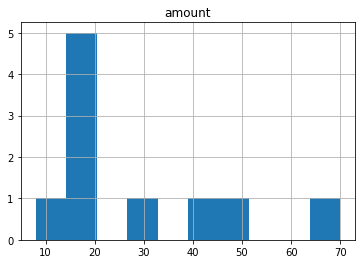

In [6]:
df.groupby('sender').sum().hist()

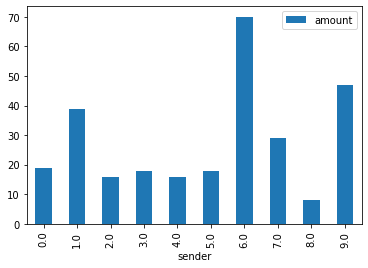

In [7]:
df.groupby('sender').sum().plot.bar()

In [8]:
df.mean()

sender    4.62
amount    2.80
dtype: float64

#### Randomized Response Mechanism



In [0]:

ndf = df.sort_index()
idx = ndf.sample(n = int(len(ndf) / 2)).sort_index().index

def randResponse(a, p):
  if np.random.rand() < p:
    if np.random.rand() < 0.5:
      return 1
    else:
      return 10
  else:
    return a

ndf.loc[idx, 'amount'] = ndf.loc[idx, 'amount'].apply(lambda x: randResponse(x, 0.1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f057723c080>]],
      dtype=object)

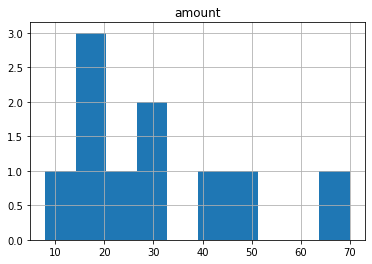

In [10]:
ndf.groupby('sender').sum().hist()

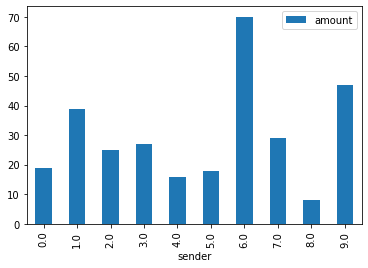

In [11]:
ndf.groupby('sender').sum().plot.bar()

In [12]:
ndf.mean()

sender    4.62
amount    2.98
dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0576f9e4a8>],
      dtype=object)

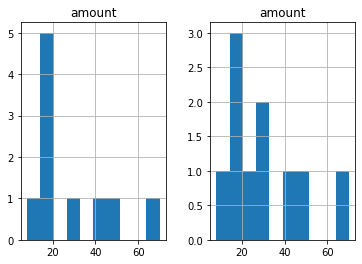

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure()

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121)

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)

df.groupby('sender').sum().hist(ax = ax1)
ndf.groupby('sender').sum().hist(ax = ax2)

### Homomorphic Encryption

### [Paillier Cryptosystem](https://en.wikipedia.org/wiki/Paillier_cryptosystem)

In [14]:
%%bash
git clone https://github.com/n1analytics/python-paillier

Cloning into 'python-paillier'...


In [15]:
%%bash
python python-paillier/setup.py

/usr/local/lib/python3.6/dist-packages/setuptools/dist.py:475: UserWarning: Normalizing '1.4.1-dev0' to '1.4.1.dev0'
  normalized_version,
usage: setup.py [global_opts] cmd1 [cmd1_opts] [cmd2 [cmd2_opts] ...]
   or: setup.py --help [cmd1 cmd2 ...]
   or: setup.py --help-commands
   or: setup.py cmd --help

error: no commands supplied
